<font size=6>**Deep Learning - Diffusion Models**</font>

# POV: You need to model a distribution!

Let's suppose we are given some [unknown] **empirical distribution**, and we need to generate **mock data**.

<div>
   <img src="images/Generated_Data.png" width="600">
</div>

<table><tr>
    <td width=700>
        <center>
            <br>
            Figure 1.1. The sampling problem.  We need to sample some data (<i>right</i>) based on some empirical distribution (<i>left</i>).<br>
        </center>
    </td>
</tr></table>

<font size=3><u>**Example cases**</u><font>

E.g., you are:

- Running an **expensive simulation** $\rightarrow$ cannot generate _all_ the data analytically

- Dealing with **imbalanced data** $\rightarrow$ need more examples of the minority class

- Assessing **some statistics** $S$ $\rightarrow$ would like to "bootstrap" to obtain a distribution for $S$

<font size=3><u>**In-class discussion [5 mins]**</u><font>

What would you do, if you had to sample _pseudo_-real data given a dataset?
    
_Discuss with your teammate, then report.  Think of possible pros and cons of your method._

<details>
<summary><b>[Spoiler]</b></summary>
<br>
E.g. <b>KDE</b> (<b>Kernel Density Estimation</b>)
<br>
<code>sklearn.neighbors.KernelDensity</code>

We can think of KDE as a **smoothed distribution** (e.g. via Gaussians) of the data.    

<div>
   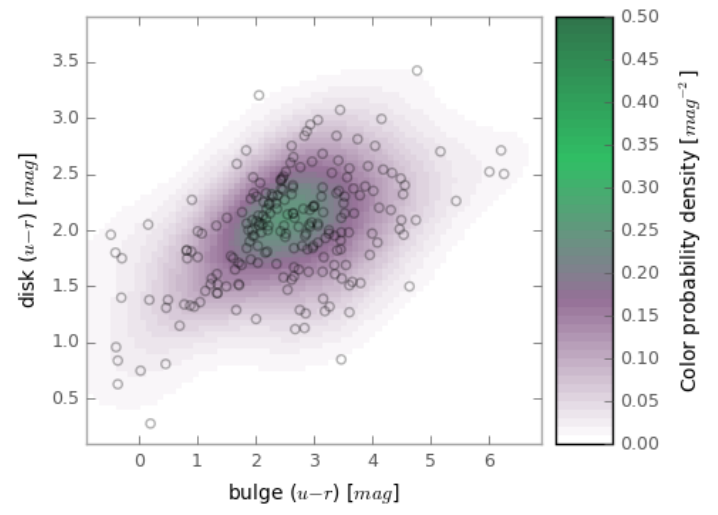
</div>

<table><tr>
    <td width=700>
        <center>
            <br>
            Figure 1b. An example of Kernel Density Estimation applied to a 2D color-color distribution.<br>
            (From <a herf="https://ui.adsabs.harvard.edu/abs/2021MNRAS.504.3831B/abstract">Bonfini et al. (2021)</a>)
        </center>
    </td>
</tr></table>

$\rightarrow$ From this **continuous** distribution we can now sample new datasets.
    
<b>PROS</b>:<br>
- Intuitive<br>
- Computationally quick
    
<b>CONS:</b><br>
- Needs parameter tuning (_kernel width_)
- Same global smoothing all over the feature ranges
</details>

- - -
    
In general, a powerful, generalizable model would:
    
- not have **parameters defined ad-hoc** (_parametric models are difficult to define for complex distributions_)
- accounting implicitly for **correlations between features**  
- **adaptable** to the local sub-distribution densities
- **unsupervised**

$\rightarrow$ e.g., **Generative Models**    

## Generative Models $vs$ Discriminative Models

What are **Generative Models**? $\rightarrow$ Best understood when defined in contrast to **Discriminative Models**.

<div>
   <img src="./images/Discriminative_vs_Generative.png" width="800">
</div>

<table><tr>
    <td width=800>
        <center>
            <br>
            Figure 1.2. Summary comparison of Discriminative (<i>left</i>) $vs$ Generative (<i>right</i>) Models.<br>
            (From <a href=https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-supervised-learning>here</a>)
        </center>
    </td>
</tr></table>

A new paradigm to catalog ML models $\rightarrow$ they can be distinguished based on <u>which probability distribution they target</u>.
 
**Discriminative Models**
- **Objective** $\rightarrow$ Differenciate between sample labels
- **Method** $\rightarrow$ Learn the conditional probability $P(y | X)$

        "How likely is this label?"

**Generative Models**
- **Objective** $\rightarrow$ Create new samples
- **Method** $\rightarrow$ Learn the joint probability $P(X, y)$ $-$ or just $P(X)$ if unsupervised
    
        "How likely is this sample, or this <sample, label> pair?"

See this [Google Developers post](https://developers.google.com/machine-learning/gan/generative) for a smooth intro.

# Diffusion models

## What are Diffusion Models?

**Diffusion Models** work by learning how to **remove noise** from the data.

The training consists in _deteriorating_ the data by first <u>adding noise</u> ...

<div>
   <img src="./images/Diffusion_Forward.png" width="800">
</div>

<table><tr>
    <td width=800>
        <center>
            <br>
            Figure 2.1 Forward diffusion process.<br>
            (From <a href=https://arxiv.org/abs/2006.11239>here</a>)
        </center>
    </td>
</tr></table>

... and then learning how to _re-construct_ the data by <u>de-noising</u>.

<div>
   <img src="./images/Diffusion_Backward.png" width="800">
</div>

<table><tr>
    <td width=800>
        <center>
            <br>
            Figure 2.2 Backward diffusion process.<br>
            (From <a href=https://lilianweng.github.io/posts/2021-07-11-diffusion-models/>here</a>)
        </center>
    </td>
</tr></table>

$\rightarrow$ A trained model can then **generate** data similar to the ones used for the training (the _learnt distribution_).

## One nifty eyey-candy example

<u>WARNING:</u>

This block will:
- require to download $\sim$7 GBs of pre-trained models in `.cache/huggingface/`, inside your home directory
- require CUDA and a GPU with at least 8 GB

_So ... well, good luck, I'll use Kaggle!_

In [1]:
#%pip install -qq -U diffusers datasets transformers accelerate ftfy pyarrow==9.0.0

In [2]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device in use:', device)

if device.type == 'cuda':
    if torch.cuda.memory_reserved(0)/1024**3 >= 8:
        from diffusers import StableDiffusionPipeline

        # Check out https://huggingface.co/sd-dreambooth-library for loads of models from the community
        model_id = "stabilityai/stable-diffusion-2" 

        # Load the pipeline
        pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
            device
        )
    else:
        print('Sorry peasant, not enough GPU memory!')        

Device in use: cuda
Sorry peasant, not enough GPU memory!


In [3]:
# Produce a sampled image! Some usage suggestions from here:
#   https://huggingface.co/blog/stable_diffusion

if device.type == 'cuda':
    if torch.cuda.memory_reserved(0)/1024**3 >= 8:
        prompt = "A screenshot from the movie Dune 1984, zoom-in on the protagonist"
        image = pipe(prompt, num_inference_steps=60, guidance_scale=5.5, height=512, width=768).images[0]
        image
    else:
        print('Sorry peasant, not enough GPU memory!')

Sorry peasant, not enough GPU memory!


In practice $-$ as you saw $-$ Diffusion Models are trained used **conditioning**.

<div>
   <img src="./images/Diffusion_Architecture.png" width="800">
</div>

<table><tr>
    <td width=800>
        <center>
            <br>
            Figure 2.3 Diffusion with conditioning.<br>
            (Adapted from <a href=https://lilianweng.github.io/posts/2021-07-11-diffusion-models/>here</a>)
        </center>
    </td>
</tr></table>


- In the eye-candy example above, the conditioning is _text_

- In [Smith et al. 2022](https://arxiv.org/abs/2111.01713), they conditioned $-$ among others $-$ on _sketches_ to create astro imaging (_code available [here](https://github.com/smith42/astroddpm)_)

<div>
   <img src="./images/Smith22_Fig7.jpg" width="400">
</div>

<table><tr>
    <td width=800>
        <center>
            <br>
            Figure 2.4 Realistic galaxy imaging built with diffusion models conditioned on a sketch.<br>
            (Figure 7 from <a href=https://arxiv.org/abs/2111.01713/>Smith et al. 2022</a>)
        </center>
    </td>
</tr></table>

This could be used e.g. to generate high-resolution imaging from cosmological simulation realizations, without passing via ray-tracing.

## The model, the myth, the math

_In the seminal paper is by [Sohl-Dickstein et al. (2015)](https://arxiv.org/abs/1503.03585), but the one which most determined the success of Diffusion Models is [Ho, Jain & Abbeel (2020; hereafter Ho+20)](https://arxiv.org/abs/2006.11239)._

_Here we will follow the method Ho+20.
For a thorough mathematical explanation, follow this fantastic [blog by L. Weng](https://lilianweng.github.io/posts/2021-07-11-diffusion-models/)._

- - -

<font size=3><u>**Forward process**</u><font>


The forward [and backward] process is a **Markov chain**, in the sense that the next **timestep** is _assumed_ to only dependend on the previous.

<div>
   <img src="./images/Diffusion_Forward.png" width="800">
</div>

In Ho+20, at each step the added noise:
- is **small** (_or else the diffusion is too fast to learn_)
- is sampled from a **Gaussian** centered at $\mu_t$ ...
- ... with the **same variance** $\beta_t$ for every feature 

$$ q(\mathbf{x}_t|\mathbf{x}_{t-1}) := \mathcal{N}(\mathbf{x}_t; \mathbf{\mu}_t, \mathbf{\beta}_t) $$

The choice of the $\beta_1$, $\beta_2$, ..., $\beta_T$ values is called **variance schedule** (_e.g. could be a linear or a sinusoidal progression_).

We can pick $\mathbf{\mu}_t$ as we like $-$ With a <u>smart choice</u> (see Ho+20), we can decide that $\mathbf{\mu}_t$ is defined as a function of $\beta_t$ themselves:

$$ q(\mathbf{x}_t|\mathbf{x}_{t-1}) := \mathcal{N}(\mathbf{x}_t; \sqrt{1-\beta_t}\mathbf{x}_{t-1}, \beta_t \mathbf{I}) $$

Now, turns out that the **Markov chain** is actually recursive, so we can get directly from $\mathbf{x}_0$ to $\mathbf{x}_t$ as: 

$$ q(\mathbf{x}_t|\mathbf{x}_{0}) := \mathcal{N}(\mathbf{x}_t; \sqrt{\bar{\alpha}_t}\mathbf{x}_{0}, (1-\bar{\alpha}_t) \mathbf{I}) $$

where $\bar{\alpha}_t := \prod_{s=1}^{t}\alpha_s$, and $\alpha_t:=1-\beta_t$.
    
$\rightarrow$ The forward process is **trivial**: no problems here, gg.
    
<table><tr>
    <td width=128>
        <img src="images/Deal_With_It.png">
    </td>
</tr></table>

<font size=3><u>**Backward process**</u><font>

Here we would like to **know** $q(\mathbf{x}_{t-1}|\mathbf{x}_{t})$, but guess what $-$ it's untractable!
   
> _Intuitively $-$ there are too many possible reconstructions, starting from pure noise._

    
<div>
   <img src="./images/Diffusion_Backward.png" width="800">
</div>

Good news: we <u>can</u> know $q(\mathbf{x}_{t-1}|\mathbf{x}_{t}, \mathbf{x}_{0})$!

That is, if we **condition on** the input, we can de-noise from timestep $t$ to $t-1$.
    
> _Intuitively $-$  we are adding information on where the starting noise came from._
    
$$ q(\mathbf{x}_{t-1}|\mathbf{x}_t, \mathbf{x}_0) := \mathcal{N}(\mathbf{x}_{t-1}; \mathbf{\tilde{\mu}_t}(\mathbf{x}_t, \mathbf{x}_0), \mathbf{\tilde{\beta}}_t) $$

were:
    
$ \mathbf{\tilde{\mu}_t}(\mathbf{x}_t, \mathbf{x}_0) := {\sqrt{\bar{\alpha}_t-1}\beta_t \over 1-\bar{\alpha}_t} \mathbf{x}_0 + {\sqrt{\bar{\alpha}_t}(1-\bar{\alpha}_{t-1}) \over 1-\bar{\alpha}_t} \mathbf{x}_t $
    
 $\mathbf{\tilde{\beta}}_t := {1-\bar{\alpha}_{t-1} \over 1-\bar{\alpha}_t}\beta_t$
    
<u>IMPORTANT:</u> Here we _assumed_ that <u>the reverse process is _also_ Gaussian</u>.  This is true as long as the diffusion is "slow" (many small timesteps).

<font size=3><u>**The caveat**</u><font>

> _"Ok, so $q(\mathbf{x}_t|\mathbf{x}_{0})$ is trivial, and I can calculate analytically $\mathbf{\tilde{\mu}_t}$ and $\mathbf{\tilde{\beta}}_t$, so I have  $q(\mathbf{x}_{t-1}|\mathbf{x}_t, \mathbf{x}_0)$ as well."_
>
> _"What do I have to model? Why I am not at the beach, already?"_
    
Chill.  Even if we have $q(\mathbf{x}_{t-1}|\mathbf{x}_t, \mathbf{x}_0)$, that is only meaningful for the **training** set $\rightarrow$ we need to generalize to _unseen_ data!
    
> _Intuitively $-$  we would be overfitting._

$\rightarrow$  We need to model the reverse process for <u>any</u> input $-$ we will use a **Neural Network**!
    
<font size=3><u>**The model**</u><font>

What do we need to **predict**?

Basically, we want to approximate:

$$ q(\mathbf{x}_{t-1}|\mathbf{x}_t, \mathbf{x}_0)$$

with a model (see Figure 2.2):

$$ p_\theta(\mathbf{x}_{t-1} | \mathbf{x}_t)$$

$\rightarrow$ Now $ q(\mathbf{x}_{t-1}|\mathbf{x}_t, \mathbf{x}_0)$ (_known_) becomes our training label that we need to predict!
    
If we can **predict the Gaussian noise**, we can subtract it and reconstruct the image, right?
    
- the **variance schedule** is _fixed_ by construction
- our NN only needs to predict $\mathbf{\tilde{\mu}_t}(\mathbf{x}_t, \mathbf{x}_0)$ !
  
$$ p_\theta(\mathbf{x}_{t-1}|\mathbf{x}_t) \rightarrow \mathbf{\mu_\theta}(\mathbf{x}_t, t) $$

<font size=3><u>**TL;DR**</u><font>

We need to train a NN that minimizes the following Loss Function:
    
$$ L = E_q \big[ {1 \over 2\beta_t} || \mathbf{\tilde{\mu}_t}(\mathbf{x}_t, \mathbf{x}_0) - \mathbf{\mu_\theta}(\mathbf{x}_t, t) ||^2 \big]  $$  

<div>
   <img src="./images/Wait.jpg" width="200">
</div>

Thanks to some <u>smart parametrization</u> of $\mu_t$ (again, see the [blog by L. Weng](https://lilianweng.github.io/posts/2021-07-11-diffusion-models/)), the loss can be simplified to:

$$ L = E_q \big[ || \mathbf{\epsilon} - \mathbf{\epsilon_\theta}(\sqrt{\bar{\alpha}_t}\mathbf{x}_{0} + \sqrt{1 - \bar{\alpha}_t}\mathbf{\epsilon}, t) ||^2 \big] ~~~~~ (1) $$   
where:

$$ \mathbf{\epsilon} \sim \mathcal{N(0, \mathbf{I})} $$

(i.e., is a value randomly drawn from a Normal distribution) and $\epsilon_\theta$ is our NN that predicts noise given a **noisy image** and **$t$**.


We can interpret Equation 1 as:

> _"Predict me how much noise has been added to this image, at timestep t."_


<font size=3><u>**Algorithm**</u><font>

- The **training** algorithm is now _extremely simple_ $\rightarrow$ we don't even need the forward pass!

<div>
   <img src="./images/Diffusion_Algo.png" width="800">
</div>
    
<table><tr>
    <td width=800>
        <center>
            <br>
            Figure 2.5 Diffusion Model algorithm from Ho+20.<br>
            (From <a href=https://arxiv.org/abs/2006.11239>here</a>)
        </center>
    </td>
</tr></table>
    
- The **sampling** algorithm is <u>not</u> conditioned on $\mathbf{x}_0$, as desired $\rightarrow$ $\mathbf{x}_0$ used only for training

## References

[1] Ho, J., Jain, A., & Abbeel, P. (2020), "_Denoising diffusion probabilistic models_", [arXiv preprint arXiv:2006.11239](https://arxiv.org/abs/2006.11239)

[2] Sohl-Dickstein, J., Weiss, E. A., Maheswaranathan, N., & Ganguli, S. (2015), "_Deep unsupervised learning using nonequilibrium thermodynamics_", [arXiv preprint arXiv:1503.03585](https://arxiv.org/abs/1503.03585)

# Mum, look! $-$ My first diffusion model!

<font size=4>**No, really, you have to come and look at this!**</font>

<font size=2>**Mum, hurry up, the School is gonna end!**</font>

<font size=1>Ok, I'll bring the laptop to the living room, but turn down the Tv at least</font>


In [4]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import os
import seaborn as sns

# Global Seaborn setup for the reminder of the notebook:
sns.set(font_scale=1.2)

from src.diffusion_utils import * 

path_results = "results"
if not os.path.exists(path_results):
    os.makedirs(path_results)

In [5]:
force_cpu = False
# to force-use CPU (debug purposes or peasants without a proper GPU)
if force_cpu:
    device = torch.device('cpu')
else:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    # Automatically move all tensors to the device:
    torch.set_default_tensor_type(torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor)

print('Device in use [cpu/cuda]:', device)

Device in use [cpu/cuda]: cuda


The following example has been coded based on [this work](https://towardsdatascience.com/diffusion-models-made-easy-8414298ce4da) by J. Rafid Siddiqui. 

## Generating some mock data

In [6]:
from sklearn.datasets import make_swiss_roll

data, _ = make_swiss_roll(1000, noise=0.2)
data    = data[:, [0, 2]]
# dropping 3rd dimension, only working in 2D

features = ['X1', 'X2']
# arbitrary feature names

df_data = pd.DataFrame(data, columns=features)
display(df_data.head(3))

X1        X2
0   5.125233 -2.791649
1  -9.242302 -0.281184
2  12.067223 -3.512766

## Visualizing data

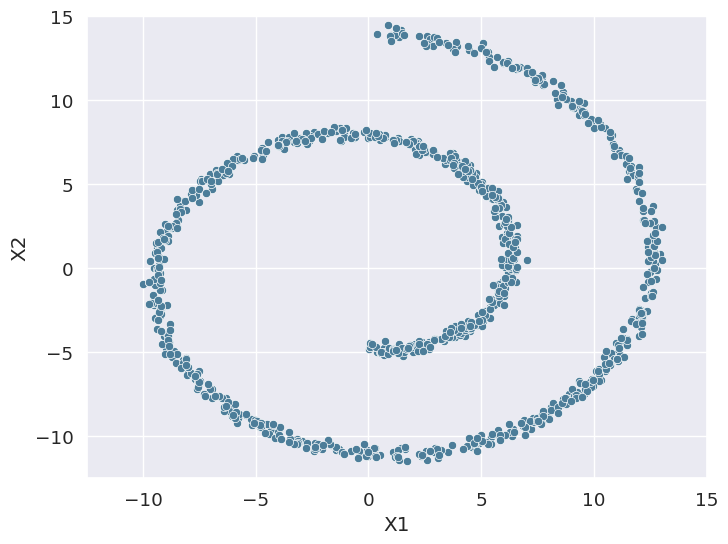

In [7]:
def plot_data(df_data, features, display=True, ax=None, color=None):
    
    color_codes_wanted = ['grey', 'green', 'purple']

    if color is None:
        palette = ["#4c7d99"]
        color_codes = ['thiscolor']
    else:
        palette = [color]
        color_codes = ['thiscolor']
    c = lambda x: palette[color_codes.index(x)]

    
    if display:
        plt.figure(figsize=(8, 6))

    if ax is not None:
        ax = sns.scatterplot(data=df_data, x=features[0], y=features[1], ax=ax, color=c('thiscolor'))
    else:
        ax = sns.scatterplot(data=df_data, x=features[0], y=features[1], color=c('thiscolor'))
            
    if ax is not None:
        ax.set_ylim(-12.5,15)
        ax.set_xlim(-12.5,15)
    else:
        plt.ylim(-12.5,15)
        plt.xlim(-12.5,15)
    
    if display:
        plt.show()

plot_data(df_data, features)

## Splitting

We are not going to use the validation set, but we leave this block here for good habit in case a real application is more sophisticated.

In [8]:
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable

df_X_train, df_X_valid, df_y_train, df_y_valid = \
    train_test_split(df_data[features],
                     _, test_size=0.3, random_state=42)

table = PrettyTable()
table.title = str('Data shape')
table.field_names = ['set', 'X', 'y']
table.add_row(['train',   np.shape(df_X_train), np.shape(df_y_train)])
table.add_row(['valid', np.shape(df_X_valid), np.shape(df_y_valid)])
print(table)

+---------------------------+
|         Data shape        |
+-------+----------+--------+
|  set  |    X     |   y    |
+-------+----------+--------+
| train | (700, 2) | (700,) |
| valid | (300, 2) | (300,) |
+-------+----------+--------+


## Scaling

In [9]:
# Scaling:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_X_train_n = df_X_train.copy()
df_X_valid_n = df_X_valid.copy()

df_X_train_n[features] = scaler.fit_transform(df_X_train_n[features])
df_X_valid_n[features] = scaler.transform(df_X_valid_n[features])

display(df_X_train.head(3))
display(df_X_train_n.head(3))

X1        X2
541 -7.864883  4.401639
440 -7.538904 -6.779455
482  4.409529 -3.138022

X1        X2
541 -1.539307  0.612392
440 -1.489756 -0.965099
482  0.326475 -0.451345

Scaled data (obviously they don't fit in the plot, but we don't care)


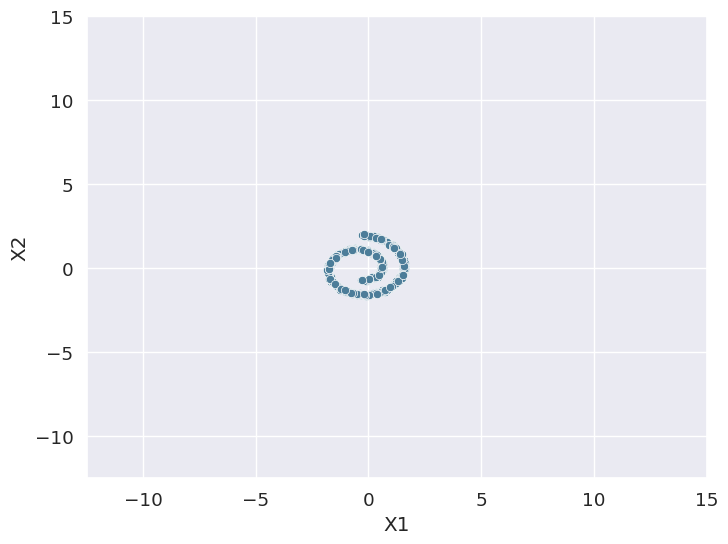

In [10]:
print("Scaled data (obviously they don't fit in the plot, but we don't care)")
plot_data(df_X_train_n, features)

In [11]:
# Converting to torch tensors:
X_train = torch.tensor(df_X_train_n[features].values).to(torch.float16)
X_valid = torch.tensor(df_X_valid_n[features].values).to(torch.float16)

n_features = np.shape(X_train)[1]
print('Number of features:', n_features)

Number of features: 2


## Diffusion Parameters

- number of timesteps

> _i.e., for how many steps we add noise_

- $\mathbf{\beta}$ schedule (and therefore $\mathbf{\alpha} = \mathbf{\alpha}(\mathbf{\beta})$):

    $ q(\mathbf{x}_t|\mathbf{x}_{0}) := \mathcal{N}(\mathbf{x}_t; \sqrt{\bar{\alpha}_t}\mathbf{x}_{0}, (1-\bar{\alpha}_t) \mathbf{I}) $

> _i.e., how intense is the noise, at each time $t$_

In [12]:
n_timesteps = 100
# number of timesteps of the diffusion procedure
# WARNING: Do not increase much beyond 100 or it will saturate the RAM

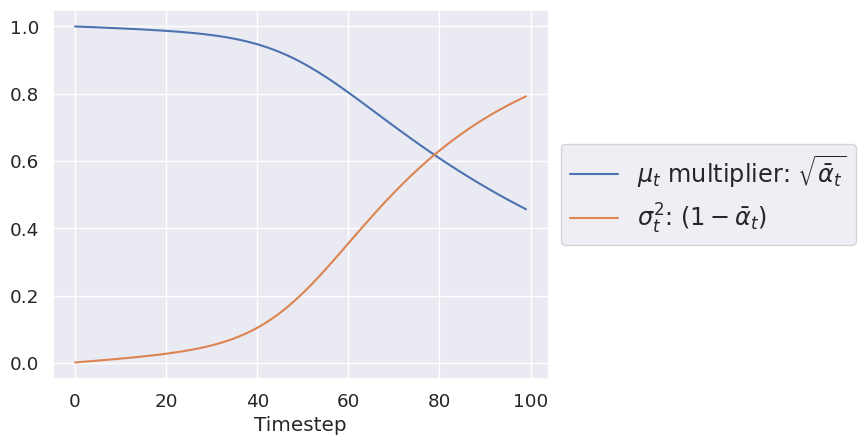

In [13]:
# Beta schedule:
betas = make_beta_schedule(schedule='sigmoid', n_timesteps=n_timesteps, start=1e-3, end=3e-2)

alphas = 1 - betas
alphas_prod = torch.cumprod(alphas, 0)
alphas_prod_p = torch.cat([torch.tensor([1]).float(), alphas_prod[:-1]], 0)
alphas_bar_sqrt = torch.sqrt(alphas_prod)
one_minus_alphas_bar_log = torch.log(1 - alphas_prod)
one_minus_alphas_bar_sqrt = torch.sqrt(1 - alphas_prod)

from matplotlib import pyplot as plt

alphas_bar_sqrt_ = alphas_bar_sqrt.detach().cpu().numpy()

plt.plot(alphas_bar_sqrt_, label=r"$\mu_t$ multiplier: ${\sqrt{\bar{\alpha}_t}}$")
plt.plot((1 - alphas_bar_sqrt_**2), label=r"$\sigma_t^2$: $(1 - \bar{\alpha}_t)$")
plt.xlabel('Timestep')
plt.legend(fontsize="large", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Forward Diffusion

NOTE: _We actually only use this only for showcasing the diffusion process ..._

- - -

For any given time $t$, we need to _sample_ $\mathbf{x}_t$ from the distribution $q(\mathbf{x}_t|\mathbf{x}_{0})$:

$$\mathbf{x}_t \sim q(\mathbf{x}_t|\mathbf{x}_{0}) := \mathcal{N}(\mathbf{x}_t; \sqrt{\bar{\alpha}_t}\mathbf{x}_{0}, (1-\bar{\alpha}_t) \mathbf{I})$$

... but with a simple re-parametrization **trick** we can take the mean and just sample around it:

$$\mathbf{x}_t = \sqrt{\bar{\alpha}_t}\mathbf{x}_{0} + (1-\bar{\alpha}_t) \epsilon$$

where: $\epsilon \sim \mathcal{N}(0, \mathbf{I})$

In [14]:
def q_x(x_0, t, epsilon=None):
    '''
    q(x_t | x_0)
    '''
    if epsilon is None:
        epsilon = torch.randn_like(x_0)
    alphas_t = extract(alphas_bar_sqrt, t, x_0)
    alphas_1_m_t = extract(one_minus_alphas_bar_sqrt, t, x_0)
    return (alphas_t * x_0 + alphas_1_m_t * epsilon)

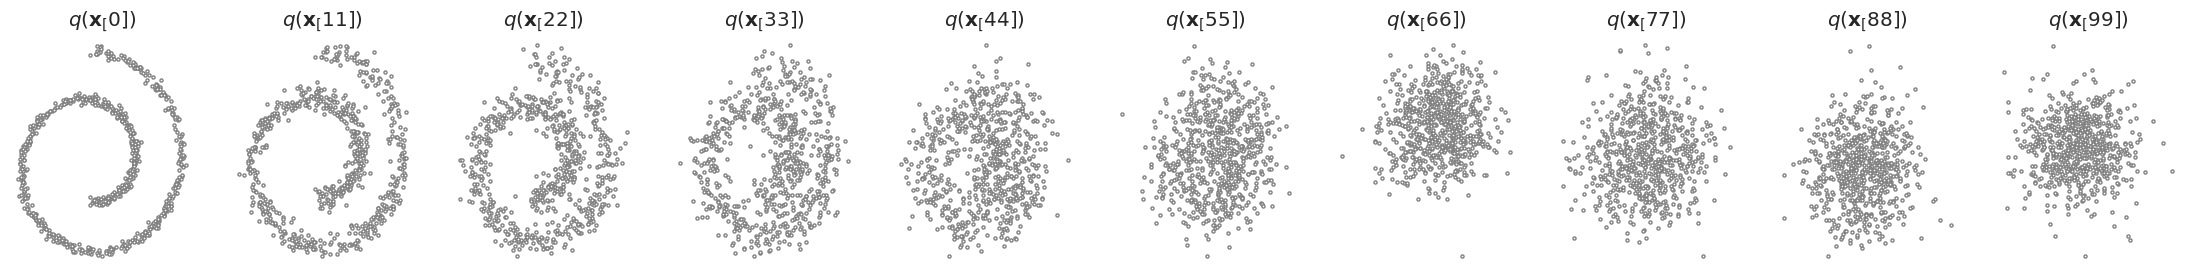

In [15]:
n_plots = 10
fig, axs = plt.subplots(1, n_plots, figsize=(28, 3))

for i, t in enumerate(np.linspace(0, n_timesteps-1, n_plots)):
    t = torch.tensor([int(t)])
    q_t = q_x(X_train, t)
    axs[i].scatter(q_t[:, 0].cpu(), q_t[:, 1].cpu(),color='white',edgecolor='gray', s=5);
    axs[i].set_axis_off(); axs[i].set_title('$q(\mathbf{x}_'+str(t.cpu().numpy())+')$') 

## Reverse Diffusion/Reconstruction

- Unlike the forward diffusion, the reverse diffusion process requires training the **neural network model** to <u>predict the noise</u>
- The model will be a simple **fully-connected** NN with a few layers

**Training** $\rightarrow$ boils down to following **Algorithm 1**, and calculating the correct **Loss**

**Sampling** $\rightarrow$ Trivial once the NN is trained, follows **Algorithm 2** (_we will give it for granted, but see code in_ `diffusion_utils.py` _if you are curious_)

In [16]:
batch_size = 128

n_epochs = 1000
# training epochs
# NOTE: At every batch of every epoch, a different time step is sampled

In [17]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class DenseWithTime(nn.Module):
    '''A modification of a basic dense layer, where the X input is actually
    replaced by the X input multiplied by the time embedding'''
    def __init__(self, num_in, num_out, n_timesteps):
        super(DenseWithTime, self).__init__()
        self.num_out = num_out
        self.lin = nn.Linear(num_in, num_out)
        self.embed = nn.Embedding(n_timesteps, num_out)
        # definition of the model (nn.Embedding) to embed the time
        self.embed.weight.data.uniform_()

    def forward(self, x, t):
        '''This gets executed when `DenseWithTime` is called.'''
        data = self.lin(x)
        t_embedded = self.embed(t)
        # embedding the specific time <t>
        out = t_embedded.view(-1, self.num_out) * data
        # reshaping time embedding and multiplying it by X
        return out
        
class ConditionalModel(nn.Module):
    def __init__(self, n_features, n_timesteps):
        '''Model layers definition.'''
        super(ConditionalModel, self).__init__()
        self.lin1 = DenseWithTime(n_features, 128, n_timesteps)
        self.lin2 = DenseWithTime(128, 128, n_timesteps)
        self.lin3 = DenseWithTime(128, 128, n_timesteps)
        self.lin4 = DenseWithTime(128, 128, n_timesteps)
        self.out = nn.Linear(128, n_features)
    
    def forward(self, x, t):
        '''This gets executed when `model` is called.'''
        x = F.relu(self.lin1(x, t))
        x = F.relu(self.lin2(x, t))
        x = F.relu(self.lin3(x, t))
        x = F.relu(self.lin4(x, t))
        return self.out(x)
    
model = ConditionalModel(X_train.shape[1], n_timesteps)
optimizer = optim.Adam(model.parameters(), lr=1e-3)    

Epoch: 0   [/1000] | Loss: 0.9963354


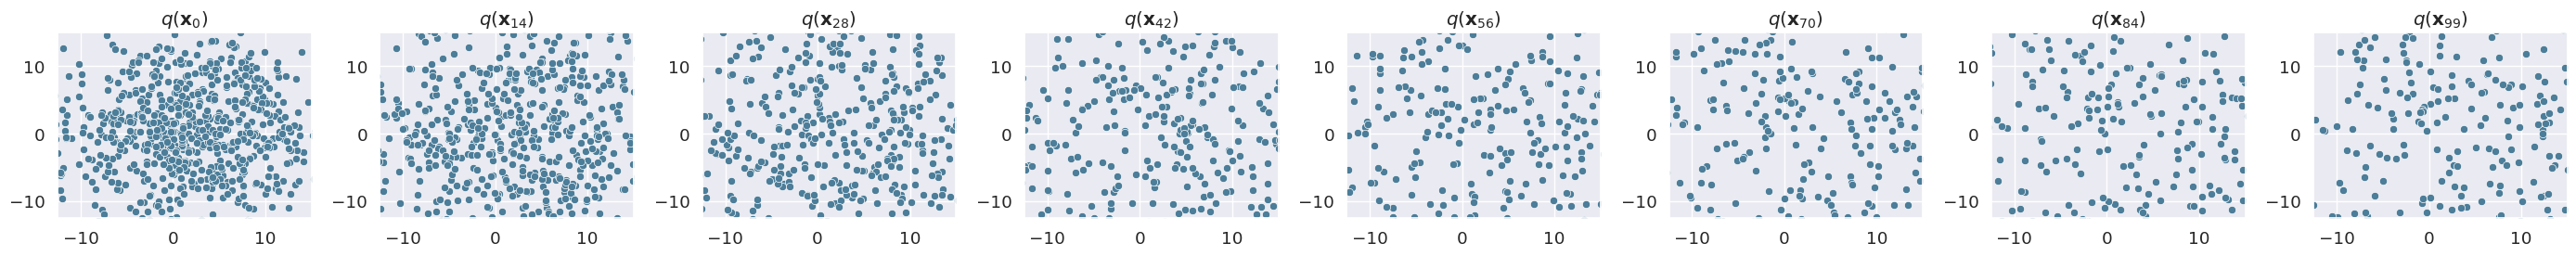

Epoch: 100 [/1000] | Loss: 0.7724681


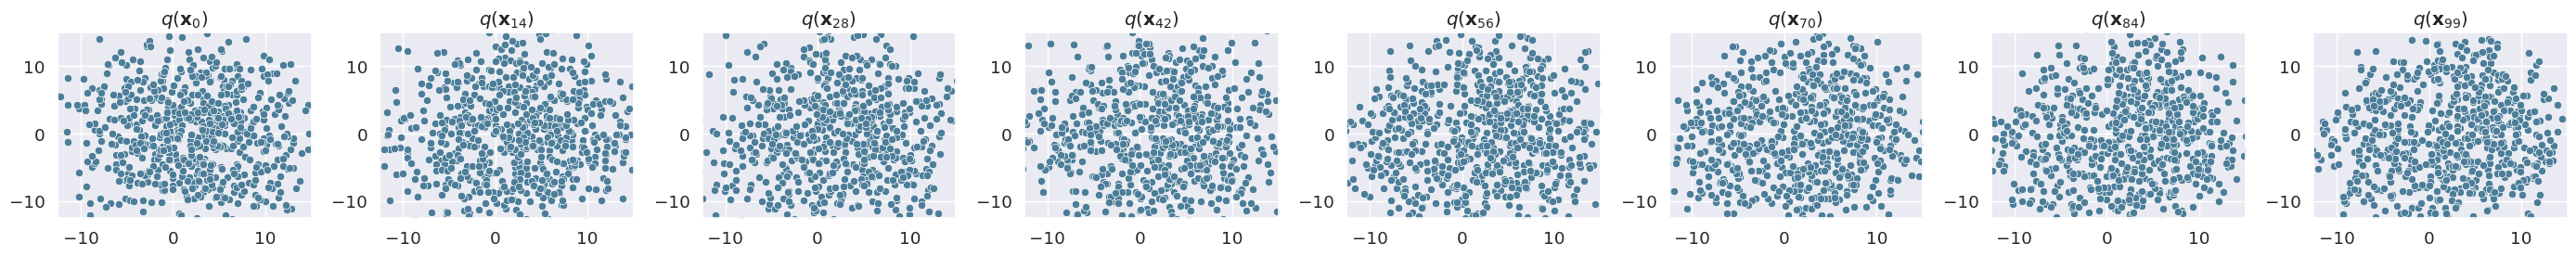

Epoch: 200 [/1000] | Loss: 0.8940641


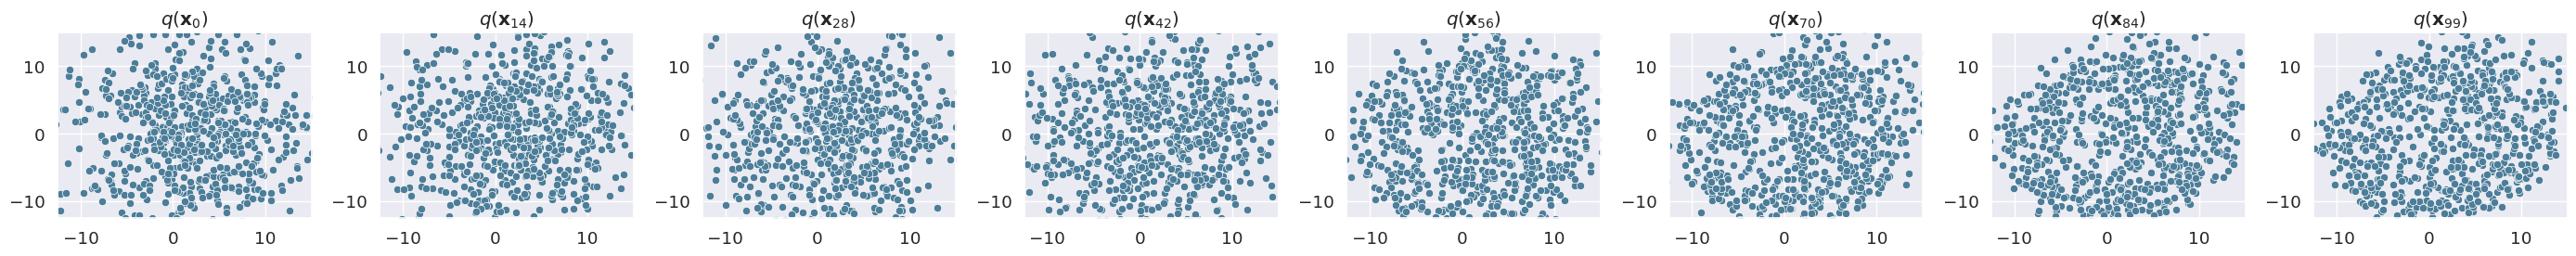

Epoch: 300 [/1000] | Loss: 0.61807877


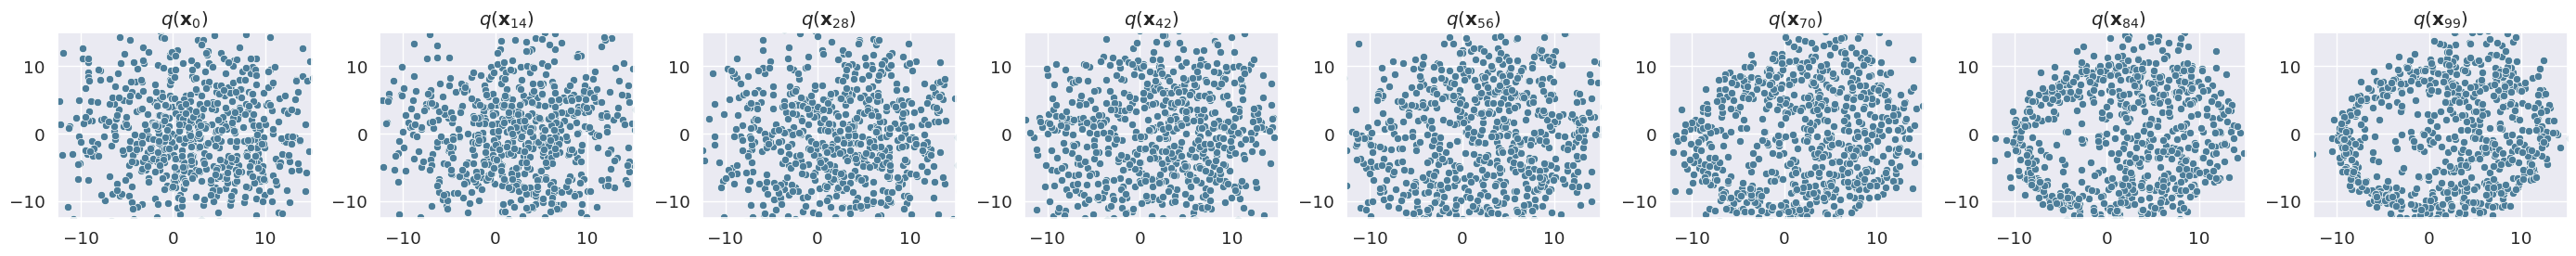

Epoch: 400 [/1000] | Loss: 0.5884086


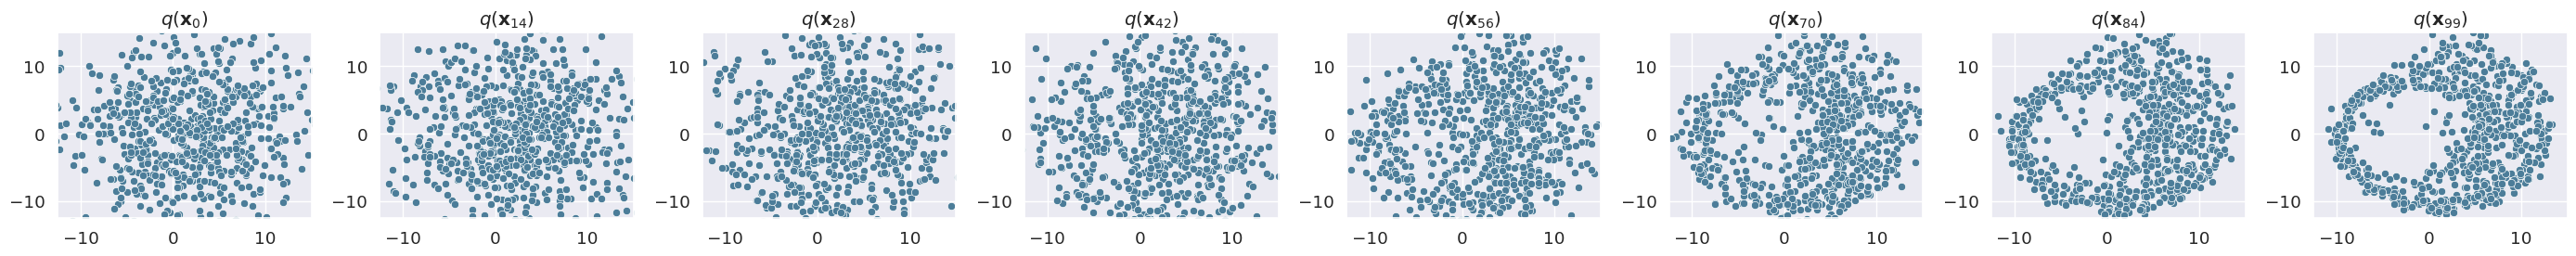

Epoch: 500 [/1000] | Loss: 0.5602716


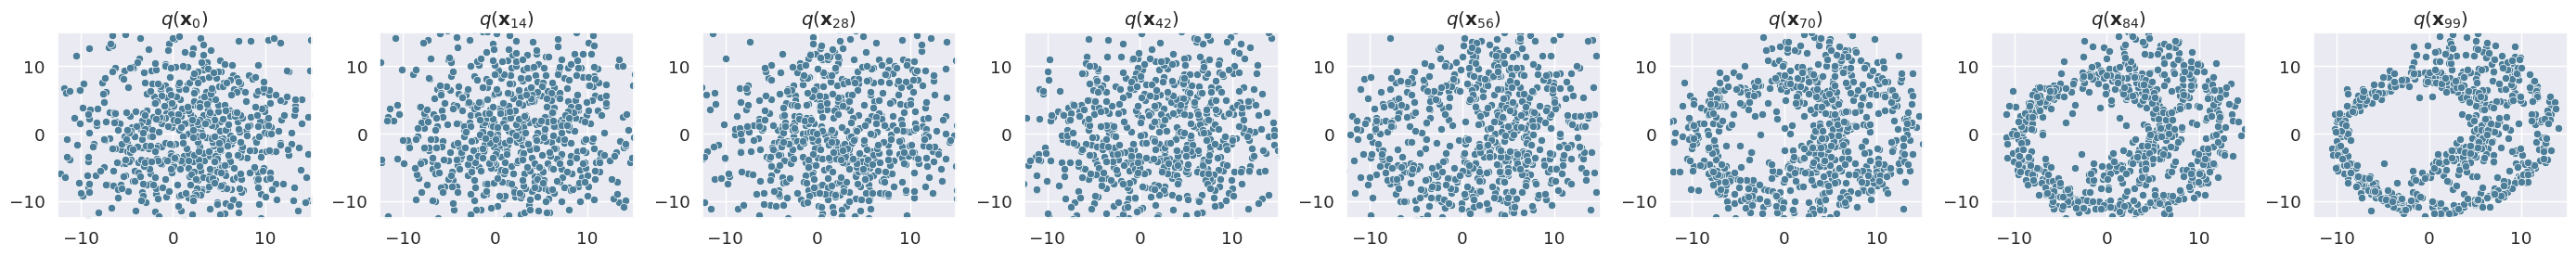

Epoch: 600 [/1000] | Loss: 0.65502816


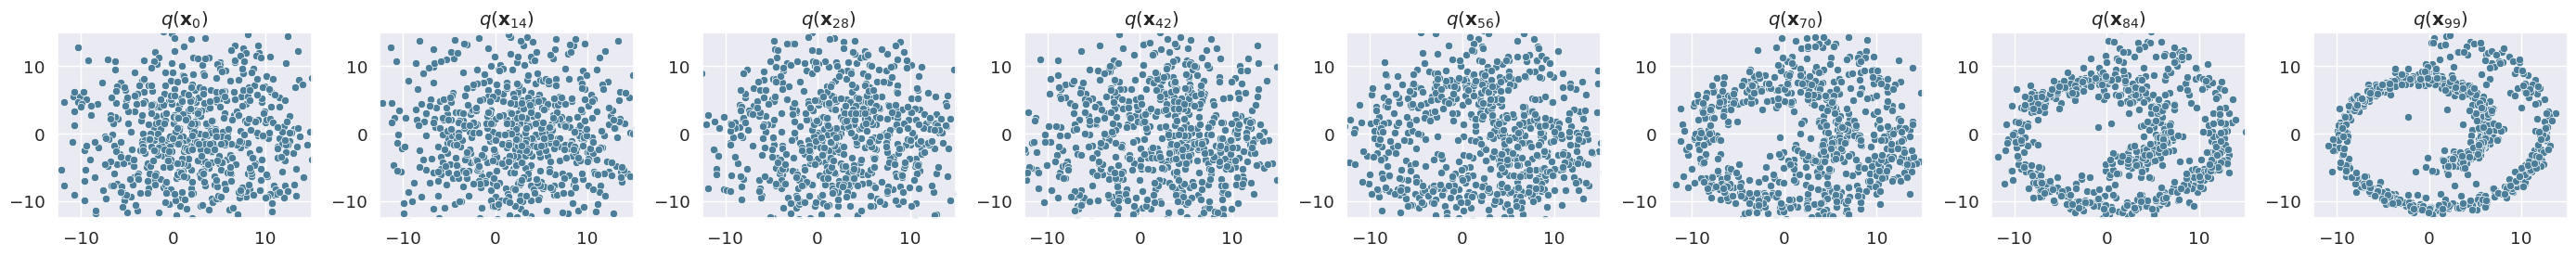

Epoch: 700 [/1000] | Loss: 0.39833072


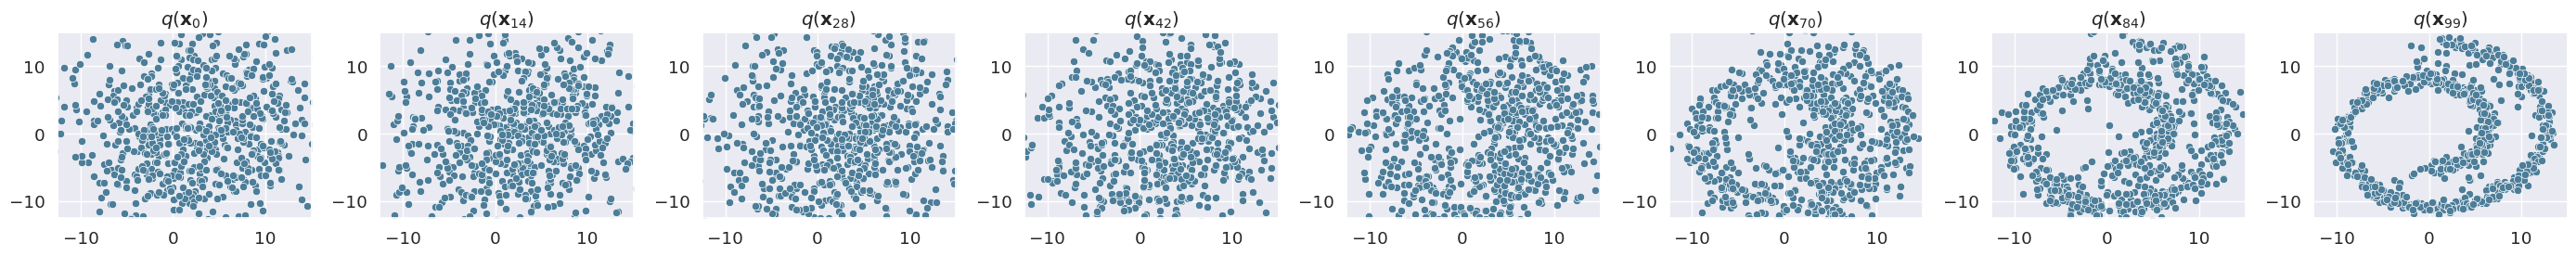

Epoch: 800 [/1000] | Loss: 0.52120864


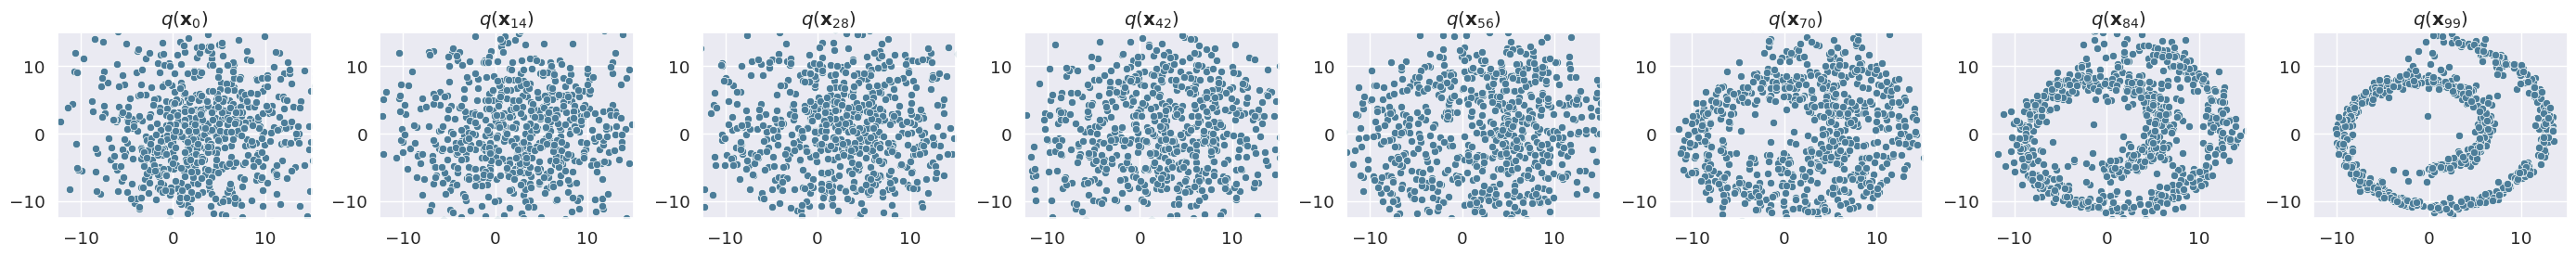

Epoch: 900 [/1000] | Loss: 0.58265185


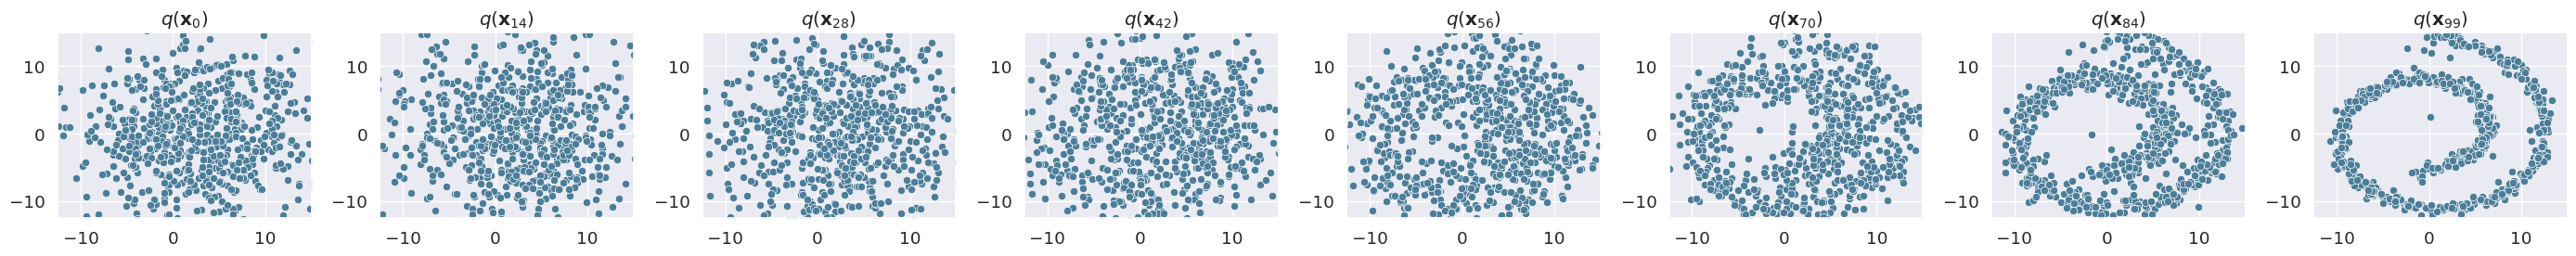

CPU times: user 33.2 s, sys: 2.44 s, total: 35.6 s
Wall time: 31.8 s


In [18]:
%%time

losses = {'train':[], 'valid':[]}

for epoch in range(n_epochs):
    permutation = torch.randperm(X_train.size()[0])
    # random permutations of the batch indexes
    epoch_loss_cum = 0
    # cumulative epoch loss over batches
    
    # Iterating over batches:
    for i in range(0, X_train.size()[0], batch_size):
        # Retrieving current batch:
        indices = permutation[i:i+batch_size]
        batch_x = X_train[indices]
        batch_size_ = len(batch_x)
        # calculating actual size since the last batch can be smaller than <batch_size>
        
        # Algorithm 1 line 3: selecting a random timestep for each sample in the batch:
        t = torch.randint(0, n_timesteps, size=(batch_size_,))
        
        # Sampling noise (first term in Loss Equation) -----------------------
        e = torch.randn_like(batch_x)
        #---------------------------------------------------------------------

        # Predicting noise using NN (second term in Loss Equation) -----------
        # - The "extract" calls are just convenience functions which pick a
        #    value of the alphas at time <t> and reshape it to the batch size
        # - The core of the prediction is where "model" is called 
        #
        # Multiplier of x_0 in the Equation:
        alpha_bar_sqrt = extract(alphas_bar_sqrt, t, batch_x)
        # Multiplier of epsilon in the Equation:
        one_minus_alpha_bar_sqrt = extract(one_minus_alphas_bar_sqrt, t, batch_x)
        # Model input:
        input_e = batch_x * alpha_bar_sqrt + one_minus_alpha_bar_sqrt*e
        # Model prediction:
        e_theta = model(input_e, t)
        #---------------------------------------------------------------------
        
        # Loss ---------------------------------------------------------------
        # Loss Equation:
        loss = (e - e_theta).square().mean()
        # NOTE: average loss across samples and features, for this epoch, this batch
        epoch_loss_cum += loss.detach().cpu().numpy()
        #---------------------------------------------------------------------

        # Optimizing the NN --------------------------------------------------
        # Before the backward pass, zero-ing all the network gradients:
        optimizer.zero_grad()
        # Backward pass: computing gradient of the loss with respect to parameters
        loss.backward()
        # Performing gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.)
        # Calling the step function to update the parameters:
        optimizer.step()
        #---------------------------------------------------------------------

    ###############################################
    # Done! The rest is just to display stuff ... #
    ###############################################

    # Storing loss:
    n_batches = np.ceil(X_train.size()[0]/batch_size)
    losses['train'].append(epoch_loss_cum/n_batches)
    # averaging over batches

    # Printing loss (every 1/10th of the total epochs):
    if (epoch % int(n_epochs/10) == 0):       
        print('Epoch: %-3s [/%3s] | Loss: %s' % (epoch, n_epochs, loss.detach().cpu().numpy()))

    # Plotting data (every 1/10th of the total epochs):
    if (epoch % int(n_epochs/10) == 0):       
        
        # Generating a whole NEW time sequence by drawing from the learnt distribution:
        x_seq_gen = p_sample_loop(model, X_train.shape, n_timesteps,
                                  alphas,betas, one_minus_alphas_bar_sqrt)
        
        # Looping through all timesteps for this epoch, and plotting a few of them:
        n_plots = 8
        fig, axs = plt.subplots(1, n_plots, figsize=(28, 3))
        for j, t in enumerate(np.linspace(0, n_timesteps-1, n_plots)):
            t = int(t)
            # Picking dataset generated for timestep <t>:
            x_t_gen = x_seq_gen[t]
            if device != 'cpu': x_t_gen = x_t_gen.detach().cpu().numpy()            
            # Reverting normalization:
            df_data_gen = pd.DataFrame(data=x_t_gen, columns=features)
            df_data_gen[features] = scaler.inverse_transform(df_data_gen[features])
            # Plotting:
            plot_data(df_data_gen, features, display=False, ax=axs[j])
            axs[j].xaxis.label.set_visible(False) 
            axs[j].yaxis.label.set_visible(False) 
            axs[j].set_title('$q(\mathbf{x}_{'+str(t)+'})$')
        plt.tight_layout()
        plt.show()

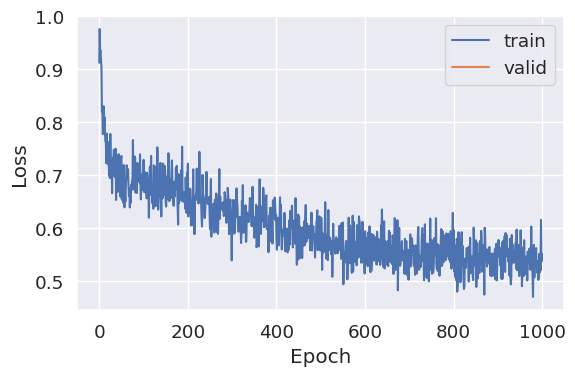

In [19]:
# Plotting the Loss:
import matplotlib.pyplot as plt

if device != 'cpu':
    losses_train = [loss for loss in losses['train']]
    losses_valid = [loss for loss in losses['valid']]

fig, axes = plt.subplots(1, 1, figsize=(6, 4))
ax = axes
ax.plot(losses_train, label='train')
ax.plot(losses_valid, label='valid')

ax.legend()
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

plt.tight_layout()
plt.show() 

## Animation

_You don't need to care about the following code, it is only for presentation purposes!_

We will create an **image sequence** that resembles the evolution of the data along the timesteps, both in the **forward** (diffusion) and in the **backward** (denoising) pass.

In the GIF:
- we first diffuse the **original** data
- we then start from **random noise** and converge towards the **sampled** distribution

IMPORTANT: _Notice that those are two different datasets! The first is the training dataset being diffused, the second is a new dataset randomly sampled (from noise) and inverse-diffused!_

_I.e., the start of the inverse-diffusion is <u>not</u> the end-point of the diffusion!  This is the whole point of learning the distribution $-$ we want to sample <u>new</u> data!_

_They sequences are just collated together to display the intuition behind the process._

In [20]:
import matplotlib
from matplotlib.colors import to_hex
import io
from PIL import Image
from tqdm import tqdm

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["tomato","teal","steelblue"])

### Generating the diffusion image sequence

100%|█████████████████████████████████████████| 100/100 [00:16<00:00,  6.00it/s]


CPU times: user 16.7 s, sys: 228 ms, total: 17 s
Wall time: 16.7 s


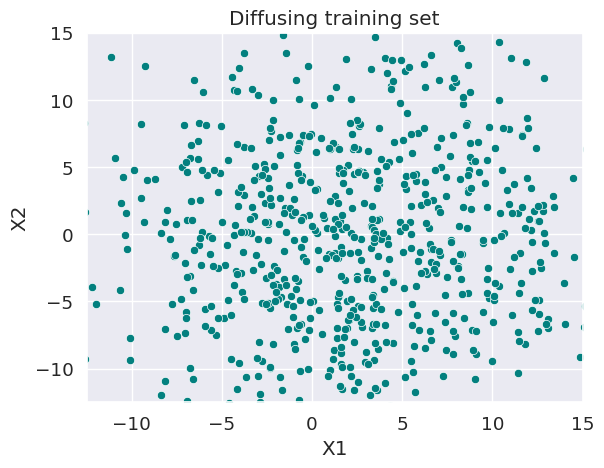

In [21]:
%%time
    
imgs_diffusion = []

pbar = tqdm(range(n_timesteps))
for t in pbar:
    plt.clf()
    q_x_t = q_x(X_train, torch.tensor([t]))
    if device != 'cpu': q_x_t = q_x_t.detach().cpu().numpy()

    # Indexing colors using first-half palette (the rest is used for the de-noising!):
    color = to_hex(cmap(t/n_timesteps/2))

    # Reverting normalization:
    df_data_noise = pd.DataFrame(data=q_x_t, columns=features)
    df_data_noise[features] = scaler.inverse_transform(df_data_noise[features])
    # Plotting:
    plt.title('Diffusing training set')
    plot_data(df_data_noise, features, display=False, color=color)

    img_buf = io.BytesIO()
    plt.savefig(img_buf, format='png')
    img = Image.open(img_buf)
    imgs_diffusion.append(img)

### Generating the de-noising [reverse] image sequence

Let's generate a brand new dataset composed of `n_samples_gen` samples!

100%|█████████████████████████████████████████| 100/100 [00:17<00:00,  5.70it/s]

CPU times: user 17.7 s, sys: 334 ms, total: 18 s
Wall time: 17.7 s


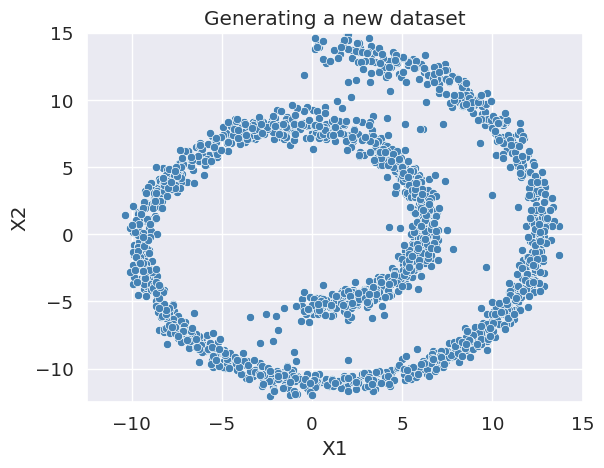

In [22]:
%%time

imgs_inv_diffusion = []

# Generating a whole NEW time sequence by drawing from the learnt distribution:
n_samples_gen = 2000
X_gen_shape = (n_samples_gen, X_train.shape[1])
x_seq_gen = p_sample_loop(model, X_gen_shape, n_timesteps,
                          alphas,betas, one_minus_alphas_bar_sqrt)

pbar = tqdm(range(n_timesteps))
for t in pbar: 
    plt.clf()
    # Picking dataset generated for timestep <t>:
    x_t_gen = x_seq_gen[t]
    if device != 'cpu': x_t_gen = x_t_gen.detach().cpu().numpy() 

    # Indexing colors using second-half palette (the rest is used for the noising!):
    color = to_hex(cmap(t/n_timesteps/2+0.5))

    # Reverting normalization:
    df_data_gen = pd.DataFrame(data=x_t_gen, columns=features)
    df_data_gen[features] = scaler.inverse_transform(df_data_gen[features])
    # Plotting:
    plt.title('Generating a new dataset')
    plot_data(df_data_gen, features, display=False, color=color)
    
    img_buf = io.BytesIO()
    plt.savefig(img_buf, format='png')
    img = Image.open(img_buf)
    imgs_inv_diffusion.append(img)    

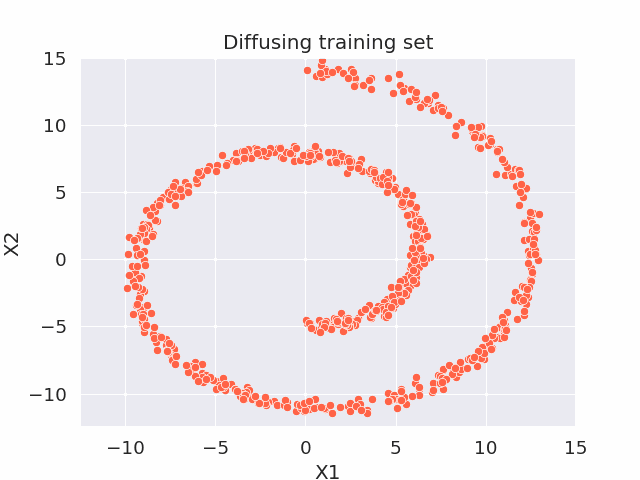

In [23]:
# Pasting the 2 seqeunces into a sequential GIF animation:
imgs_timeline = imgs_diffusion + imgs_inv_diffusion

imgs_timeline[0].save(path_results+'/diffusion_roll.gif', format='GIF', append_images=imgs_timeline,
             save_all=True, duration=50, loop=0)

import IPython

def show_image(filename):
    with open(filename, 'rb') as f:
        img = f.read()
    IPython.display.display(IPython.display.Image(data=img, format='gif'))

show_image(path_results+'/diffusion_roll.gif')

# In-class Exercise: diffuse a BPT

**Dataset**: We will use a dataset of SDSS galaxies prepared by [Daoutis Charalampos](https://www.ia.forth.gr/people/Daoutis), carrying information about multiple emission lines and galaxy classification (paper in preparation).

The class is only used for displaying purposes, and discarded for the actual analysis.

_NOTE: Don't be intimidated! $-$ The following code is 99% copy-pasted from above, with minor differences in the train/test splitting and plotting._

In [27]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch
import os

from src.diffusion_utils import * 

path_results = "results"
if not os.path.exists(path_results):
    os.makedirs(path_results)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
force_cpu = False
# to force-use CPU (debug purposes)
if force_cpu:
    device = torch.device('cpu')
else:
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    # Automatically move all tensors to the device:
    torch.set_default_tensor_type(torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor)

print('Device in use [cpu/cuda]:', device)

Device in use [cpu/cuda]: cuda


## Importing Data


In [29]:
import os
import wget
import pandas as pd

path_data = './data'
# path of data folder

path_to_data = path_data+"/BPT_emlines.csv"
# path/to/file to be created

# > BPT_emlines.csv
#link_data = "https://github.com/astrostatistics-in-crete/2023_summer_school/blob/ac06b58182bcfb9e1db0826147b1bf771069a1a7/DL_Diffusion/data/BPT_emlines.csv"

if not os.path.exists(path_data):
    os.makedirs(path_data)

#if not os.path.exists(path_to_data):
#    response = wget.download(link_data, path_to_data)

df_data = pd.read_csv(path_to_data)

# Limiting data:
frac_sampling = 0.02
df_data = df_data.groupby('Target_class', group_keys=False).apply(lambda x: x.sample(frac=frac_sampling))
# stratified sampling

display(df_data.head(5))
print(df_data.shape)

features = ['log(NII_6584/H_ALPHA)', 'log(OIII_5007/H_BETA)']
# x-axis and y-axis features in the BPT diagram
print('Features used in this exercise:', features)

log_sqred_OIII_5007_EQW   D4000_N  log(OIII_5007/H_BETA)  \
43675                 2.833858  1.630131               0.901202   
27138                 2.174748  1.504673               0.774480   
3399                  2.510004  1.246810               0.511584   
10041                 2.613474  1.540054               0.979028   
43250                 2.232097  1.481237               0.672092   

       log(NII_6584/H_ALPHA) Target_class  
43675              -0.035990          AGN  
27138               0.014512          AGN  
3399               -0.414558          AGN  
10041               0.109495          AGN  
43250              -0.115663          AGN

(906, 5)
Features used in this exercise: ['log(NII_6584/H_ALPHA)', 'log(OIII_5007/H_BETA)']


## Visualizing data

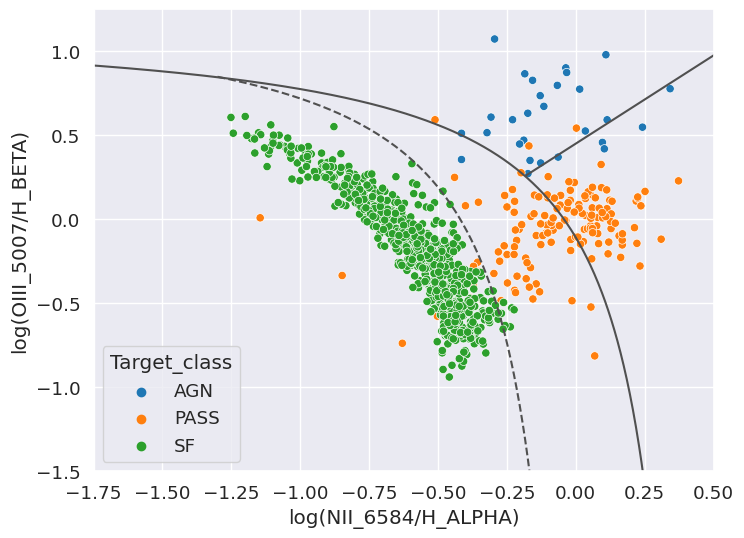

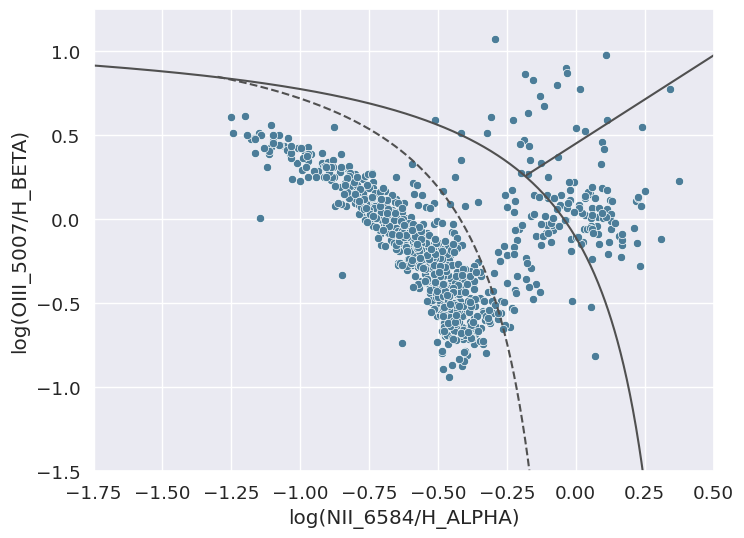

In [30]:
import seaborn as sns
from matplotlib import pyplot as plt

# Global Seaborn setup for the reminder of the notebook:
sns.set(font_scale=1.2)

def plot_data(df_data, features, show_classes=False, display=True, ax=None, color=None):
    
    color_codes_wanted = ['grey', 'green', 'purple']

    if color is None:
        palette = ["#4c7d99"]
        color_codes = ['thiscolor']
    else:
        palette = [color]
        color_codes = ['thiscolor']
    c = lambda x: palette[color_codes.index(x)]

    
    if display:
        plt.figure(figsize=(8, 6))

    if show_classes:
        if ax is not None:
            ax = sns.scatterplot(data=df_data, x=features[0], y=features[1],
                        hue='Target_class', palette='tab10', ax=ax)  
        else:
            ax = sns.scatterplot(data=df_data, x=features[0], y=features[1],
                        hue='Target_class', palette='tab10')
    else:
        if ax is not None:
            ax = sns.scatterplot(data=df_data, x=features[0], y=features[1], ax=ax, color=c('thiscolor'))
        else:
            ax = sns.scatterplot(data=df_data, x=features[0], y=features[1], color=c('thiscolor'))
            
    # Kewley+01:
    xx_Ke = np.linspace(-2.5, 0.3, 1000)
    yy_Ke = (0.61/( xx_Ke  - 0.47  )) + 1.19

    # Schawinski+07:
    xx_Sc = np.linspace(-0.180, 1.5, 1000)
    yy_Sc = 1.05*xx_Sc + 0.45

    # Kauffmann+03:
    xx_Ka = np.linspace(-1.3, 0., 1000)
    yy_Ka = 0.61/(xx_Ka -0.05) + 1.3

    if ax is not None:
        ax.plot(xx_Ke, yy_Ke, '-' , color='#505050') # Kewley+01
        ax.plot(xx_Sc, yy_Sc, '-',  color='#505050') # Schawinski+07
        ax.plot(xx_Ka, yy_Ka, '--', color='#505050') # Kauffmann+03     

        ax.set_ylim(-1.5,1.25)
        ax.set_xlim(-1.75,0.5)
    else:
        plt.plot(xx_Ke, yy_Ke, '-' , color='#505050') # Kewley+01
        plt.plot(xx_Sc, yy_Sc, '-',  color='#505050') # Schawinski+07
        plt.plot(xx_Ka, yy_Ka, '--', color='#505050') # Kauffmann+03     
        
        plt.ylim(-1.5,1.25)
        plt.xlim(-1.75,0.5)
    
    if display:
        plt.show()
    
plot_data(df_data, features, show_classes=True)
plot_data(df_data, features, show_classes=False)

## Splitting

_You know the drill ..._

In [31]:
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable

df_X_train, df_X_valid, df_y_train, df_y_valid = \
    train_test_split(df_data[['log(NII_6584/H_ALPHA)', 'log(OIII_5007/H_BETA)']],
                     df_data['Target_class'], test_size=0.3, random_state=42)

table = PrettyTable()
table.title = str('Data shape')
table.field_names = ['set', 'X', 'y']
table.add_row(['train',   np.shape(df_X_train), np.shape(df_y_train)])
table.add_row(['valid', np.shape(df_X_valid), np.shape(df_y_valid)])
print(table)

+---------------------------+
|         Data shape        |
+-------+----------+--------+
|  set  |    X     |   y    |
+-------+----------+--------+
| train | (634, 2) | (634,) |
| valid | (272, 2) | (272,) |
+-------+----------+--------+


## Scaling

In [32]:
# Scaling:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_X_train_n = df_X_train.copy()
df_X_valid_n = df_X_valid.copy()

df_X_train_n[features] = scaler.fit_transform(df_X_train_n[features])
df_X_valid_n[features] = scaler.transform(df_X_valid_n[features])

display(df_X_train.head(3))
display(df_X_train_n.head(3))

log(NII_6584/H_ALPHA)  log(OIII_5007/H_BETA)
41268              -0.561791              -0.119152
24606              -0.884276               0.249594
4332               -0.648291              -0.004970

log(NII_6584/H_ALPHA)  log(OIII_5007/H_BETA)
41268              -0.295055               0.091029
24606              -1.420537               1.202711
4332               -0.596942               0.435259

Scaled data (obviously they don't fit in the plot, but we don't care)


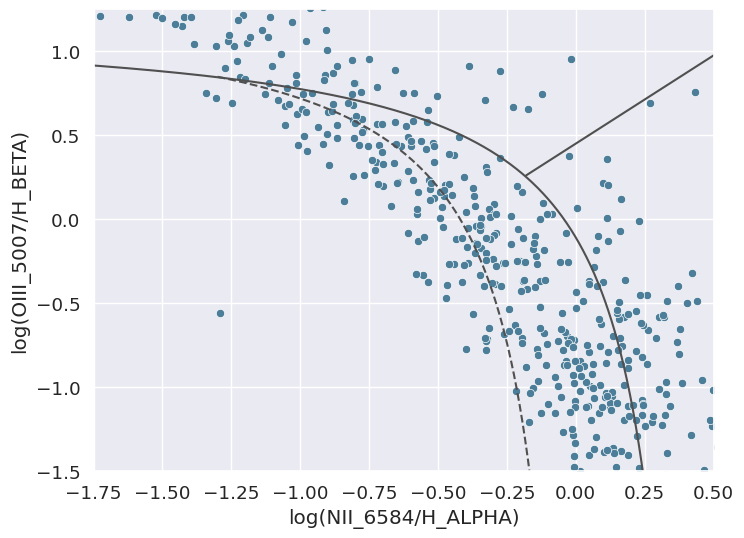

In [33]:
print("Scaled data (obviously they don't fit in the plot, but we don't care)")
plot_data(df_X_train_n, features)

In [34]:
# Converting to torch tensors:
X_train = torch.tensor(df_X_train_n[features].values).to(torch.float16)
X_valid = torch.tensor(df_X_valid_n[features].values).to(torch.float16)

n_features = np.shape(X_train)[1]
print('Number of features:', n_features)

Number of features: 2


## Your turn!

**Objective**: Learn a model which can sample from a heuristic BPT distribution.

**Task**: 

1. **First, just copy-paste the code from above $-$ do not change a thing! $-$ and just train the model!**
<br>
2. **Think of how you would change the code if you were to calculate the loss _also_ for the validation set $-$ don't do it, just think!**
<br>
3. **Try to improve the model by changing network and diffusion parameters**

    Try to generate a distribution which is as close as possible to the original one.  Observe how the model convergence changes with the modification of the hyperparameters, and note down your observations for later discussion.

    Try one/two things at a time, and re-run every time to see what happens.  You can experiment with:
    1. **Different $\beta$ schedules**
    <br><br>
    2. **Different network architectures** 
        - number of layers
        - number of neurons
        - activation functions
    <br><br>
    3. **Number of training epochs and batch sizes**    

<table><tr>
    <td width=640>
        <img src="images/I_Know_Diffusion.png">
        <center>
            <br>
            <i>Neo</i> flexes the confidence typical of a student at the last day of the AstroStatistics School.<br>
            Spoiler $-$ he gets his ass handed over by <i>Morpheus</i>.<br>
        </center>
    </td>
</tr></table>    

# In-class Discussion

What did you observe?

<details>
<summary><b>[Spoiler]</b></summary>

- The $\beta$ schedule/epochs should be such to guarantee complete noise diffusion
    
  _Corollary: Because $\beta_t$ is the same for every feature, it is important that the data are normalized_
<br>
    
- A simpler model suffices for the BTP: the roll is a more complicated dataset!

  _Corollary: As usual, a validation set is actually needed to avoid overfitting!_

## Measuring the difference via K-L

> How can we **quantitatively assess** the difference between the _original_ and a _sampled_ distribution?

Or, how do we know that our model produces <u>trustworthy</u> samples?

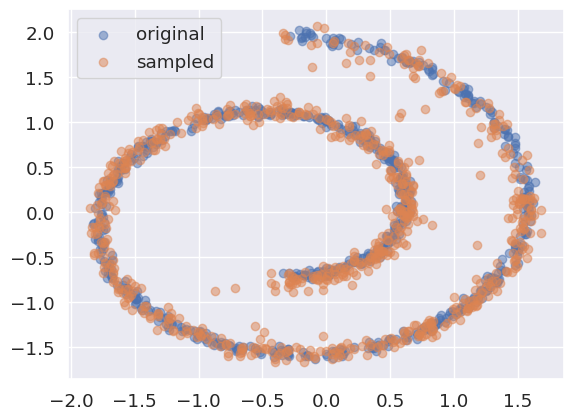

In [24]:
X_gen = x_seq_gen[-1][:X_train.size()[0]]
# extracting the last generated dataset, i.e. the one at time t

if device != 'cpu':
    X_gen_   = X_gen.detach().cpu().numpy()
    X_train_ = X_train.detach().cpu().numpy()
else:
    X_gen_   = X_gen.detach().numpy()
    X_train_ = X_train.detach().numpy()
    
plt.scatter(X_train_[:,0], X_train_[:,1], alpha=0.5, label='original')
plt.scatter(X_gen_[:,0],   X_gen_[:,1],   alpha=0.5, label='sampled')
plt.legend()
plt.show()

**Kullback-Leibler Divergence**

$$D_{KL} (~p(x)||q(x)~) = \sum_{x \in X} p(x)~ln{p(x) \over q(x)}$$

> _Intuitively: Information represented by the **approximated** distribution $q(x)$ when the **original** distribution is $p(x)$ $-$ see e.g. [here](https://medium.com/@rahulrajdob23/kullback-leibler-divergence-an-intuitive-explanation-ea9fc0e2e20)._

The video below (from [here](https://www.assemblyai.com/blog/content/media/2022/05/KL_Divergence.mp4)) shows the evolution of the K-L divergence as $q$ varies $\rightarrow$ Notice that $D_{KL} = 0$ $\Leftrightarrow$ $p(x)$ = $q(x)$


In [25]:
%%HTML
<center><video width="600" controls autoplay loop>
      <source src="images/KL_Divergence.mp4" type="video/mp4">
</video></center>

In [26]:
from src.KLdivergence import KLdivergence

print('KL divergence between training data and itself: %.2f' %\
     KLdivergence(X_train_, X_train_+1e-10))
# ... plus a tiny number to avoid division by 0
print('KL divergence between generated data and training data: %.2f' %\
     KLdivergence(X_gen_, X_train_))

KL divergence between training data and itself: -inf
KL divergence between generated data and training data: 0.04


/data/schools/Astrostatistics_School_Crete_2023/2023_summer_school/13_DL_Diffusion/src/KLdivergence.py:47: RuntimeWarning: divide by zero encountered in divide
  return -np.log(r/s).sum() * d / n + np.log(m / (n - 1.))


In [ ]:
###EOF